# Exploratory Data Analysis
- https://towardsdatascience.com/13-key-code-blocks-for-eda-classification-task-94890622be57

In [2]:
# import all libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
# sneak peak into the data
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# We can drop the id column since it has no impact on the outcome (stroke)
del data['id']

data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# Dimensions of the dataset
data.shape

(5110, 11)

We have 5110 entries of patients with 11 attributes, 10 being independant variables and 1 (stroke) being the dependant or target variable

In [6]:
# Data types of various columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


Object data types are catagorical, whereas the rest are numerical. This helps us identify what plots to use while visualizing this data

## Numeric Features
Numeric (continuous) features, the values are grouped in ranges, also known as bins

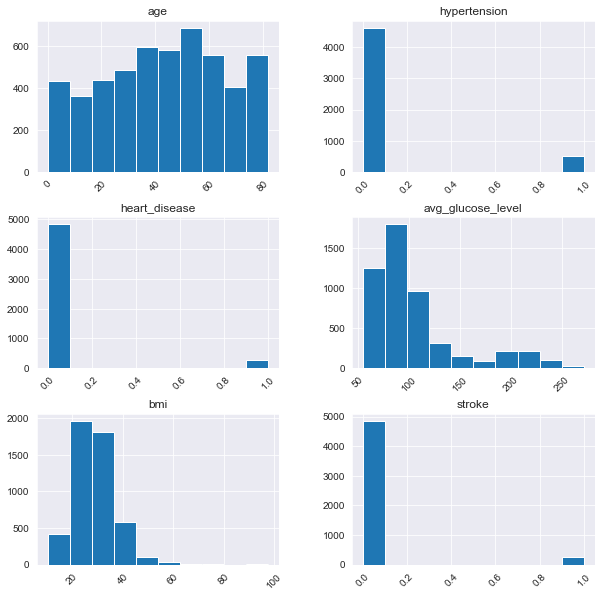

In [7]:
data.hist(figsize=(10,10),xrot=45)
plt.show()

- Age is represented quite evenly, though most data lies between ages 20-60
- Age must be an int instead of a float
- Hypertension has a huge data imbalance with most values being 0
- Hypertension must be a binary int value instead of float
- Heart Disease has a huge data imbalance with most values being 1
- Heart Disease must be a binary int value instead of a float
- Stroke is the target variable. It has imbalance since most values are negative or 0
- Stroke must be a binary int value instead of a float

In [8]:
# converting hypertension, heart_disease and stroke into int
data['age'] = data['age'].astype(int)
data['hypertension'] = data['hypertension'].astype(int)
data['heart_disease'] = data['heart_disease'].astype(int)
data['stroke'] = data['stroke'].astype(int)


# show data
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
# Numeric features summary statistics
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.215264,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.633866,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


- bmi has some missing or NAN values since its count is lower than the number of entries
- thre seems to be some outliers in the bmi data
- Otherwise the data seems consistant, the mean and median (50th percentile) values are close enough and there arent any outliers

## Categorical features
Categorical features are columns that contain only a handful of unique values, and therefore each value belongs to a particular class or group.

In [10]:
# Categorica features summary statistics
data.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


- There seems to be no NAN or missing values

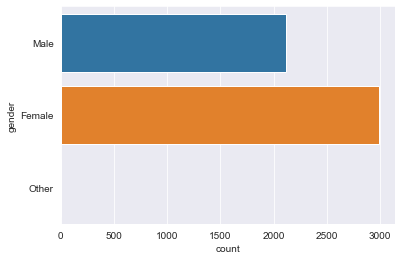

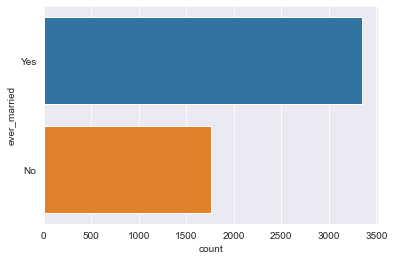

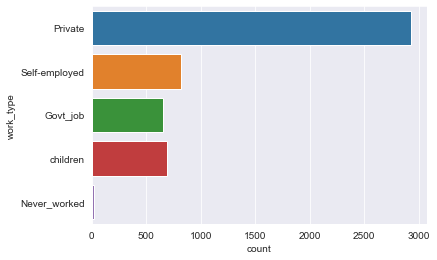

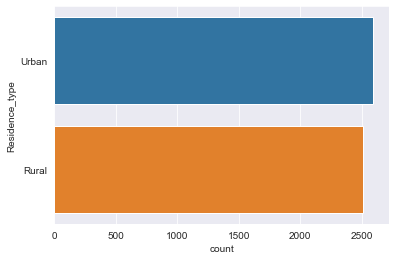

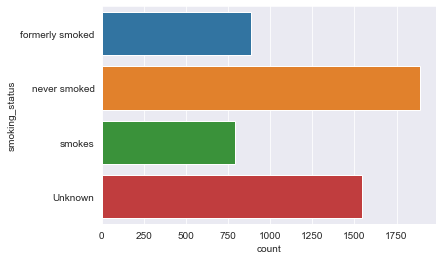

In [11]:
# Plotting catagorical features
for col in data.select_dtypes(include='object'):
    sns.countplot(y=col, data=data)
    plt.show()

- There are a few more females than males in our dataset
- There are almost twice the amount of married people than unmarried people
- The 'ever_married' category can be converted into a numerical feature
- Most of the patients worked in private sector, with almost none being unemployed
- We have an equal number of patients living in urban and rural areas
- We have some patients with unknown smoking status, thus smoking status might not be a great feature

In [12]:
# converting 'ever_married' categorical feature to numerical feature
data['ever_married'] = data['ever_married'].replace({'Yes':'1', 'No': '0'}).astype(int)

# show data
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1


In [13]:
# Since we did some changes to the datatypes, lets see how our dataframe looks now
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 439.3+ KB


## Target against some Numeric Features
Here, we will separate the data by the target feature and observe how some numeric features are distributed among those who had a stroke (stroke = 1) and those who did not have a stroke (stroke = 0)

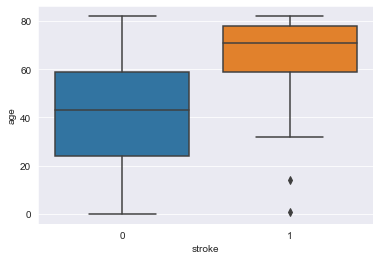

In [33]:
# boxplot for age
sns.boxplot(x = data['stroke'].astype('category'), y = 'age', data=data)
plt.show()

- we can clearly see that stroke is more prevalent at older ages

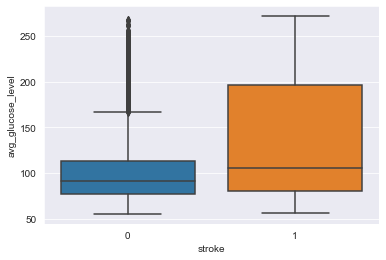

In [36]:
# boxplot for avg_glucose_level
sns.boxplot(x = data['stroke'].astype('category'), y = 'avg_glucose_level', data=data)
plt.show()

- we can see that patients with a higher average glucose level were more susceptible to stroke

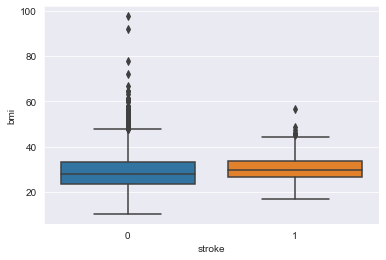

In [45]:
# boxplot for bmi
sns.boxplot(x = data['stroke'].astype('category'), y = 'bmi', data=data)
plt.show()

- bmi values seem to be close, but slightly higher bmi suggest more risk of stroke

## Target against some Catagorical Features
We will see how target variable is related to each catagorical feature

In [49]:
for col in data.select_dtypes(include='object'):
    display(pd.crosstab(data['stroke'], data[col], normalize='index'))
#     display(pd.crosstab(data['stroke'], data[col]))

gender,Female,Male,Other
stroke,,,
0,0.586916,0.412878,0.000206
1,0.566265,0.433735,0.000000


work_type,Govt_job,Never_worked,Private,Self-employed,children
stroke,,,,,
0,0.128369,0.004526,0.571076,0.155112,0.140918
1,0.132530,0.000000,0.598394,0.261044,0.008032


Residence_type,Rural,Urban
stroke,,
0,0.493726,0.506274
1,0.457831,0.542169


smoking_status,Unknown,formerly smoked,never smoked,smokes
stroke,,,,
0,0.307961,0.167661,0.370706,0.153672
1,0.188755,0.281124,0.361446,0.168675


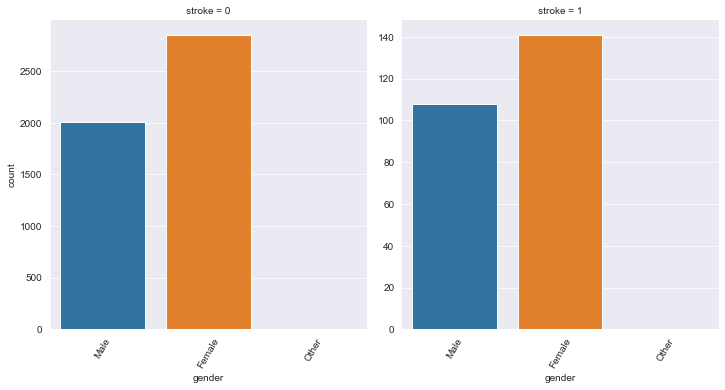

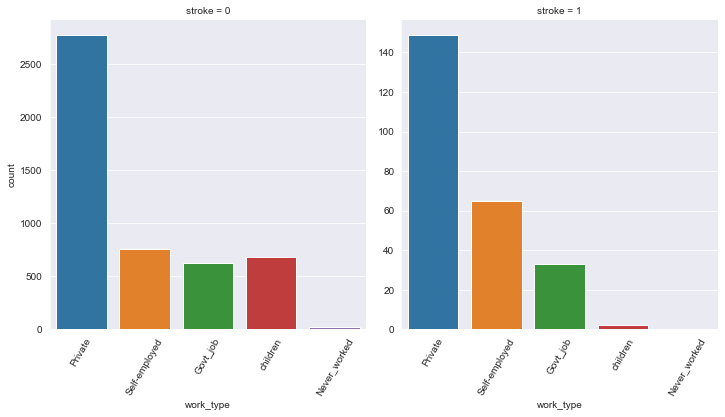

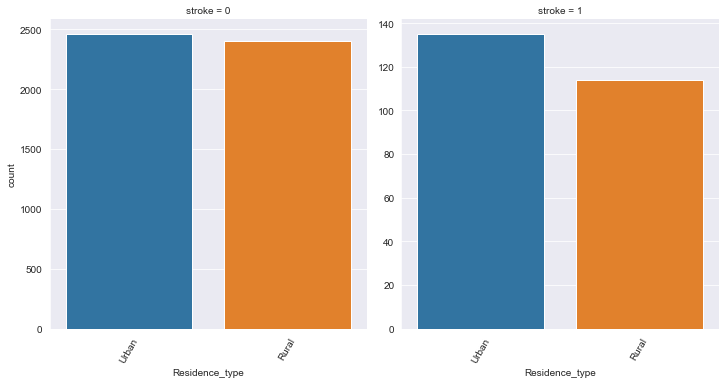

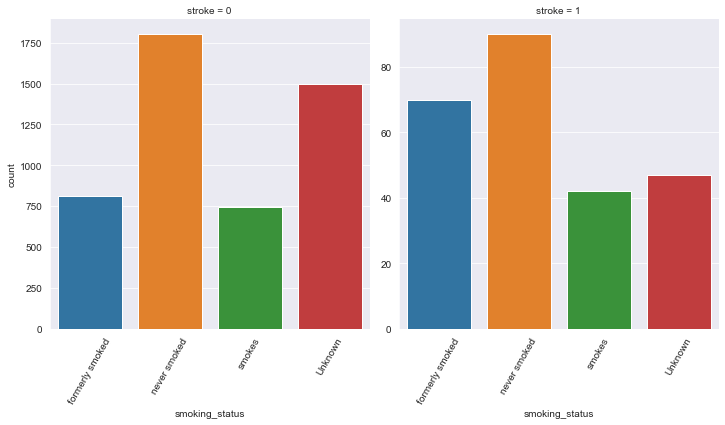

In [51]:
for col in data.select_dtypes(include='object'):
    g = sns.catplot(x = col, kind='count', col = 'stroke', data=data, sharey=False)
    g.set_xticklabels(rotation=60)

- The percentage of data per each class with no stroke seems consistant with the percentage of data per each class with a stroke but for children and never_workes in the work_type feature, there is a dramatic decrease, indicating most children and patients who never worked have the least chance of getting a stroke

## Group numeric features by categorical features

We will see how catagorical features are related to numeric features.

In [53]:
for col in data.select_dtypes(include='object'):
    display(data.groupby(col)[['age', 'hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level', 'bmi']].mean())

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi
gender,,,,,,
Female,43.748497,0.092184,0.037742,0.668337,104.057809,29.065758
Male,42.468558,0.104965,0.077069,0.639243,109.088520,28.647936
Other,26.000000,0.000000,0.000000,0.000000,143.330000,22.400000


,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi
work_type,,,,,,
Govt_job,50.879756,0.111111,0.054795,0.821918,107.779772,30.522063
Never_worked,16.181818,0.000000,0.000000,0.000000,96.042727,25.545455
Private,45.503932,0.096068,0.054017,0.719316,106.796844,30.304625
Self-employed,60.201465,0.175824,0.098901,0.865690,112.645446,30.211871
children,6.756914,0.000000,0.001456,0.000000,94.400277,20.038003


,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi
Residence_type,,,,,,
Rural,42.889419,0.099841,0.053302,0.653142,106.375235,28.894212
Urban,43.530817,0.095146,0.054700,0.659091,105.927307,28.892289


,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi
smoking_status,,,,,,
Unknown,30.192358,0.033679,0.031088,0.416451,99.601541,25.666352
formerly smoked,54.929944,0.135593,0.087006,0.833898,112.886079,30.747192
never smoked,46.744715,0.122622,0.047569,0.719873,107.558092,29.982559
smokes,47.096324,0.119138,0.077313,0.773131,108.017440,30.543555


## Interactions between Numeric Features and other Numeric Features

A correlation matrix is a table used to summarize the associations between numeric features. The same features are shown in the rows and columns, and each cell holds the correlation coefficient of two features. The correlation coefficient is a measure of the strength of the relationship between the two variables and can take any value between -1 and 1. The correlation of a feature with itself is 1.

In [54]:
corr = data.corr()
corr

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
age,1.000000,0.276303,0.263668,0.679181,0.238060,0.333738,0.245128
hypertension,0.276303,1.000000,0.108306,0.164243,0.174474,0.167811,0.127904
heart_disease,0.263668,0.108306,1.000000,0.114644,0.161857,0.041357,0.134914
ever_married,0.679181,0.164243,0.114644,1.000000,0.155068,0.341695,0.108340
avg_glucose_level,0.238060,0.174474,0.161857,0.155068,1.000000,0.175502,0.131945
bmi,0.333738,0.167811,0.041357,0.341695,0.175502,1.000000,0.042374
stroke,0.245128,0.127904,0.134914,0.108340,0.131945,0.042374,1.000000


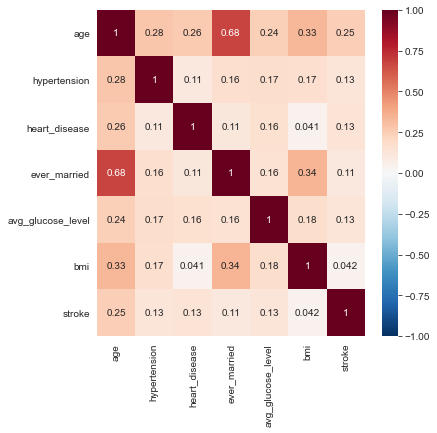

In [55]:
# Visualization using seaborn heatmap
plt.figure(figsize=(6,6))
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

- We see that there is a strong positive correlation etween age and ever_married, which is true in real life since people tend to marry around a 20-35 and never marry before 18 years, so there is a clear correlation between them.
- We also see a weak positive correlation between bmi and ever_married
- We also see a weak positive correlation between bmi and age
- There is not a single negative correlation here